In [2]:
import torch
import os
if "is/sg2" in os.getcwd():
    os.environ["CUDA_VISIBLE_DEVICES"] = "3"
from utils import seed_everything
import numpy as np

if "is/sg2" in os.getcwd():
    HF_CACHE_DIR = '/is/sg2/mkaut/.cache/huggingface/hub'
else:
    HF_CACHE_DIR = '/home/mkaut/.cache/huggingface/hub'


In [3]:
from diffusers import FluxPipeline, DiffusionPipeline


pipe = DiffusionPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", 
                                    torch_dtype=torch.bfloat16,
                                    cache_dir=HF_CACHE_DIR)
pipe.to("cuda")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

FluxPipeline {
  "_class_name": "FluxPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "black-forest-labs/FLUX.1-dev",
  "feature_extractor": [
    null,
    null
  ],
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "T5TokenizerFast"
  ],
  "transformer": [
    "diffusers",
    "FluxTransformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [2]:
from diffusers import StableDiffusionPipeline,DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base",
                                                  cache_dir=HF_CACHE_DIR)
pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "stabilityai/stable-diffusion-2-1-base",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

`height` and `width` have to be divisible by 16 but are 512 and 870.4. Dimensions will be resized accordingly


  0%|          | 0/50 [00:00<?, ?it/s]

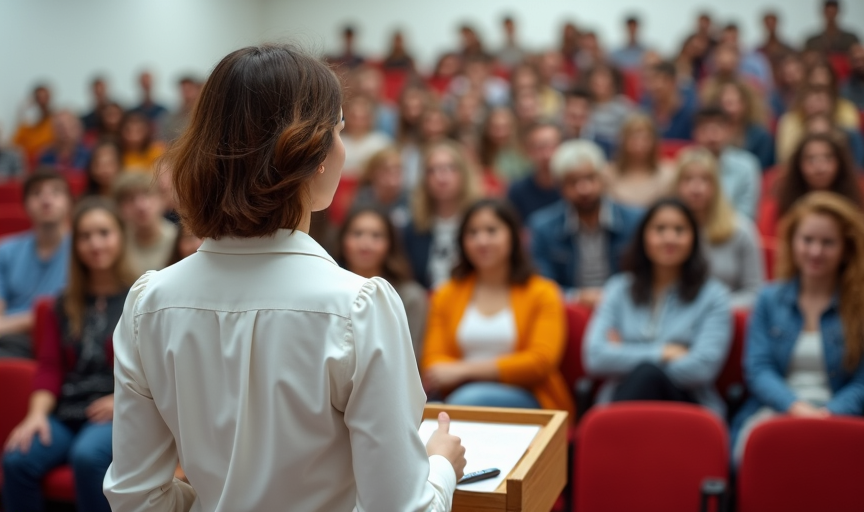

In [22]:

prompts_single = "A young female speaker with short wavy brown hair in a white blouse at a podium facing a huge audience of a diverse group of young adults dressed casually, sitting in rows of chairs, in a lecture hall with white walls, photo over her shoulder, extra bright spotlight lighting on her, microphone on podium, clothing colorpalette red, orange, blue creating a professional and academic atmosphere."


resolution = 512 
seed = 898679 # 13 best

seed_everything(seed) # local function to set all available seeds
#generators = [torch.Generator("cuda").manual_seed(s) for s in range(len(prompts))]

images = pipe(prompts_single, 
            #generator=generators,
            num_inference_steps=50, 
            guidance_scale=3.0,
            height=resolution,
            width=resolution*1.7,
            ).images

display(images[0])


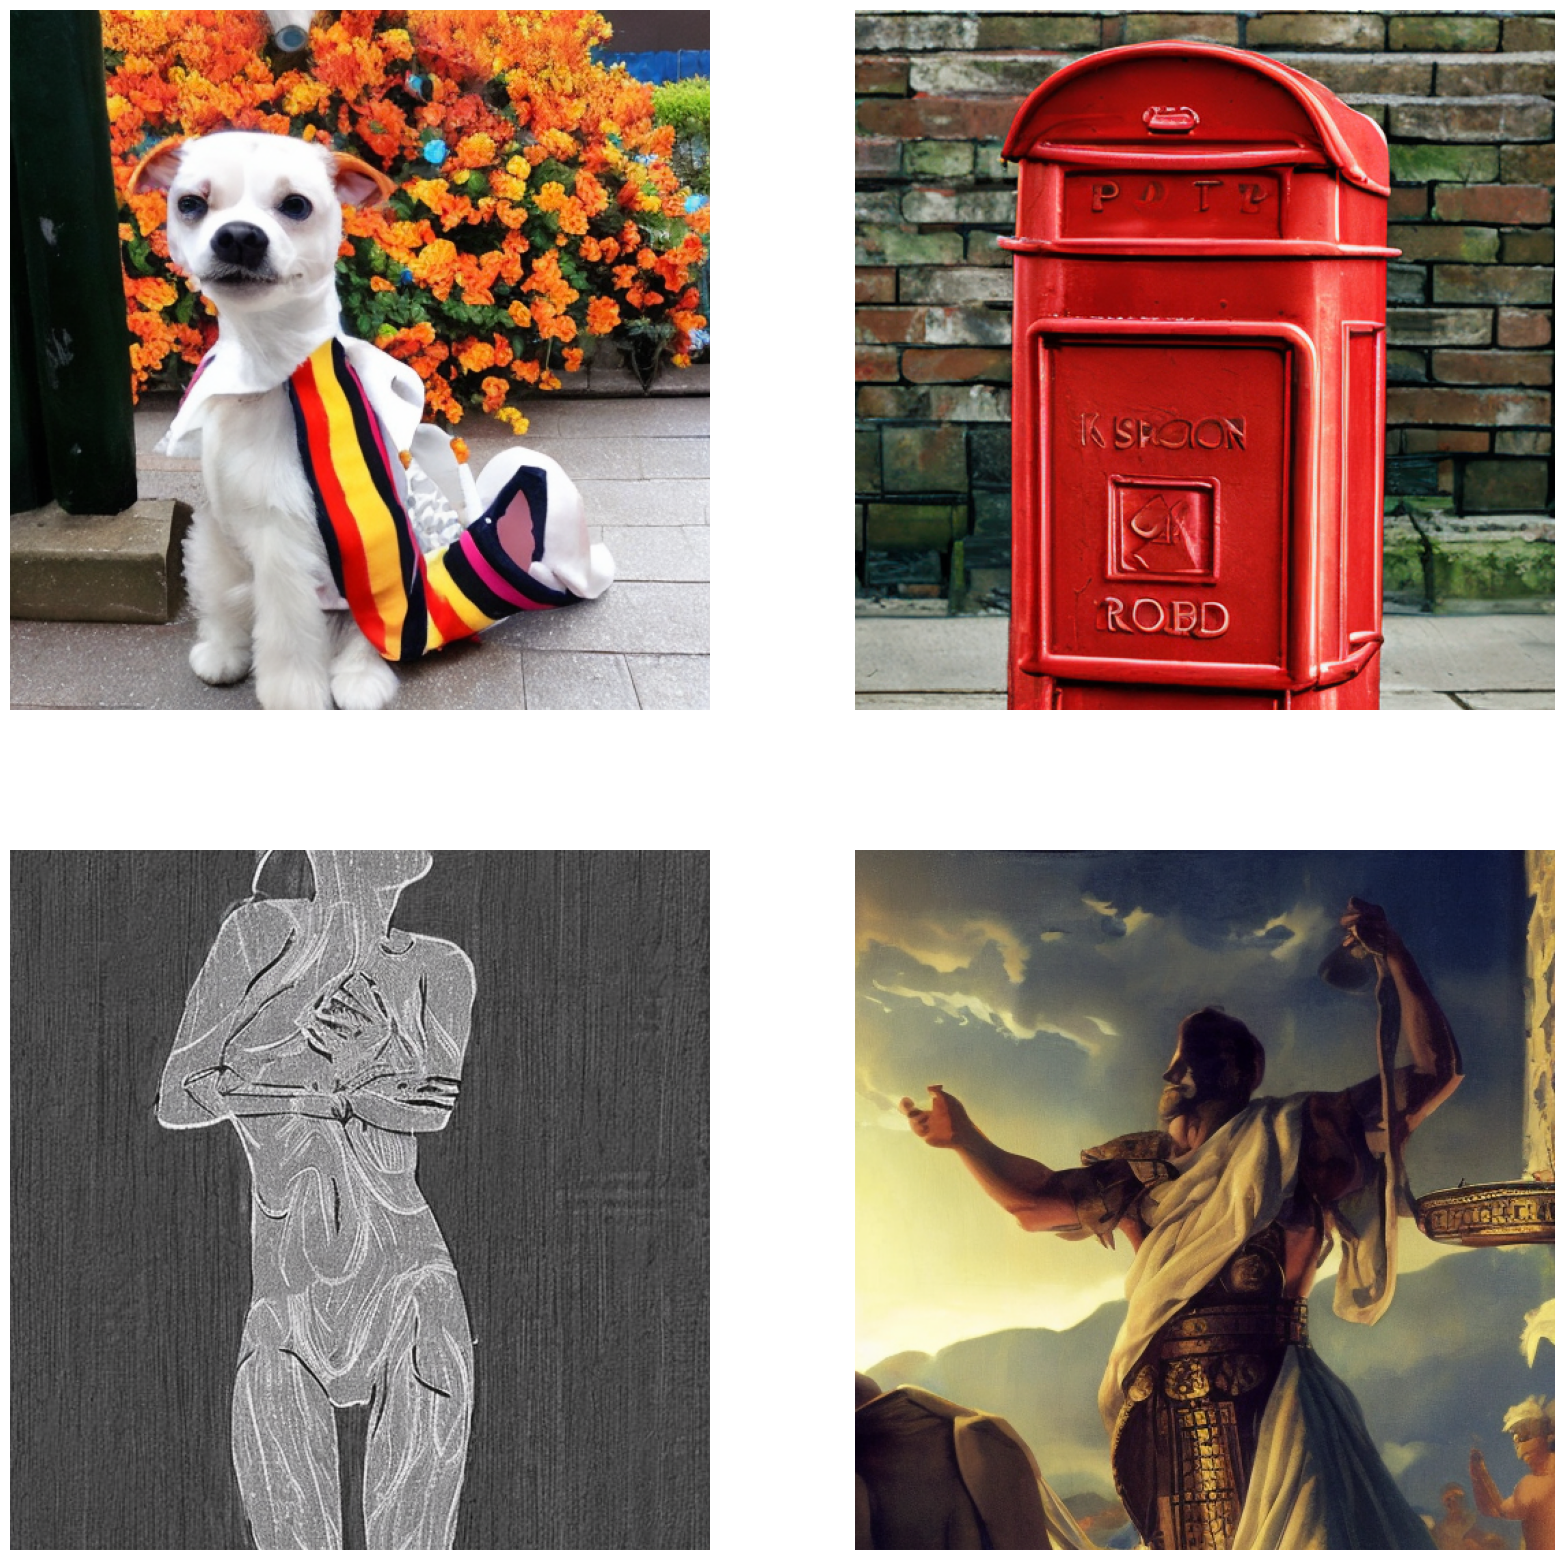

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(int(np.ceil(np.sqrt(len(prompts)))), int(np.ceil(np.sqrt(len(prompts)))), figsize=(20, 20))
for i in range(len(prompts)):
    ax[i // int(np.ceil(np.sqrt(len(prompts))) ), i % int(np.ceil(np.sqrt(len(prompts))) )].imshow(images[i])
    ax[i // int(np.ceil(np.sqrt(len(prompts))) ), i % int(np.ceil(np.sqrt(len(prompts))) )].axis("off")


plt.show()
